#Lab02 - Solução

## Estabelecendo o problema
O Framingham Heart Study é um dos mais longos estudos na área de doenças do coração. Ele avalia diversos aspectos da vida dos pacientes originais, de seus filhos e até de seus netos, buscando fatores que afetem a sua saúde cardíaca. O conjunto de dados deste Lab apresenta alguns dados de saúde de mais de 1400 pacientes. Para cada paciente são apresentados dados obtidos em seu primeiro exame no estudo. Você encontrará as seguintes variáveis: SBP: Pressão sanguinea sistólica; DBP: Pressão sanguinea diastólica; Cholesterol: que é o nível de colesterol total do paciente; CIG: número de cigarros fumados/dia; Age: a idade do paciente; Sex: Masculino/Feminino.

A análise de dados de saúde é sempre desafiadora. Nosso conhecimento acerca das funções e reações do corpo, embora tenha avançado muito, ainda é limitada. Por isso os protocolos para ensaios clínicos são bem rigorosos. Principalmente na análise de dados. Ao analisar estes dados, esforce-se para achar insights interessantes, mas não caia na armadilha da correlação/causalidade. Além disso, você deveria se importar com a presença de ouliers nos dados e procurar observar os parâmetros de saúde em diferentes estratos (por idade, por sexo, por nível de consumo de cigarros).

**O que fazer?**

Agora você vai investigar os dados destes pacientes. Explore os dados usando o que você aprendeu e anote o que foi observado. Você deveria usar tanto conhecimento de análise 1D quanto 2D.  Apresente um link de compartilhamento do seu colab. Ele deve conter código e texto explicativo dos seus achados.

**Questões motivadoras**

* erá que as mulheres fumam mais que homens?
* Qual a correlação entre a quantidade de cigarros consumidos por dia e a pressão sanguínea? As outras variáveis impactam nesta correlação?
* Qual a correlação entre a quantidade de cigarros consumidos por dia e o colesterol? As outras variáveis impactam nesta correlação?
* Qual o impacto da idade nas variáveis indicativas de saúde colesterol e pressão?

**Dados**

https://raw.githubusercontent.com/glaucogoncalves/p-e/main/framingham.csv

**Mais sobre**

https://dasl.datadescription.com/datafile/framingham/

# Baixando os dados

In [ ]:
!wget https://raw.githubusercontent.com/glaucogoncalves/p-e/main/framingham.csv

--2022-10-27 12:50:19--  https://raw.githubusercontent.com/glaucogoncalves/p-e/main/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38364 (37K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>]  37.46K  --.-KB/s    in 0.003s  

2022-10-27 12:50:20 (10.6 MB/s) - ‘framingham.csv’ saved [38364/38364]



#Carregando os dados

In [ ]:
import pandas as pd

coracao = pd.read_csv('framingham.csv', index_col=0)

coracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cholesterol  1406 non-null   int64  
 1   Age          1406 non-null   int64  
 2   Sex          1406 non-null   object 
 3   SBP          1406 non-null   int64  
 4   DBP          1406 non-null   int64  
 5   CIG          1404 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 76.9+ KB


In [ ]:
coracao = coracao.dropna()
coracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1405
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cholesterol  1404 non-null   int64  
 1   Age          1404 non-null   int64  
 2   Sex          1404 non-null   object 
 3   SBP          1404 non-null   int64  
 4   DBP          1404 non-null   int64  
 5   CIG          1404 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 76.8+ KB


In [ ]:
coracao["MAP"] = (coracao.SBP + 2*coracao.DBP)/3
coracao["Hiper"]=coracao.MAP > 100
coracao

,Cholesterol,Age,Sex,SBP,DBP,CIG,MAP,Hiper
0,216,45,MALE,90,50,5.0,63.333333,False
1,237,49,MALE,100,64,0.0,76.000000,False
2,215,47,MALE,100,70,50.0,80.000000,False
3,340,48,MALE,108,70,0.0,82.666667,False
4,149,49,MALE,108,75,0.0,86.000000,False
...,...,...,...,...,...,...,...,...
1401,260,60,FEM,140,84,0.0,102.666667,True
1402,267,62,FEM,140,90,0.0,106.666667,True
1403,233,61,FEM,185,115,0.0,138.333333,True
1404,263,61,FEM,152,95,0.0,114.000000,True


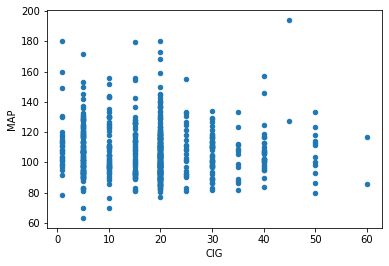

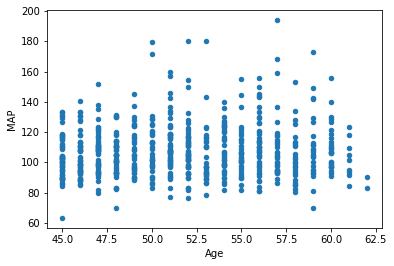

In [ ]:
coracao_fumantes = coracao[coracao.CIG>0]
coracao_fumantes.plot.scatter("CIG","MAP")
coracao_fumantes.plot.scatter("Age","MAP")

,Cholesterol,Age,SBP,DBP,CIG,MAP,Hiper
Cholesterol,1.000000,0.009542,0.099883,0.122128,-0.053325,0.117223,0.138357
Age,0.009542,1.000000,0.136484,0.008196,-0.087508,0.074085,0.018445
SBP,0.099883,0.136484,1.000000,0.804348,-0.059040,0.946621,0.632259
DBP,0.122128,0.008196,0.804348,1.000000,-0.026321,0.952939,0.693605
CIG,-0.053325,-0.087508,-0.059040,-0.026321,1.000000,-0.044404,-0.021882
MAP,0.117223,0.074085,0.946621,0.952939,-0.044404,1.000000,0.698904
Hiper,0.138357,0.018445,0.632259,0.693605,-0.021882,0.698904,1.000000


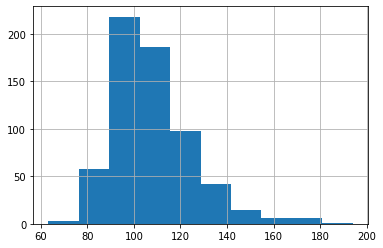

In [ ]:
coracao_fumantes.MAP.hist()
coracao_fumantes.corr()

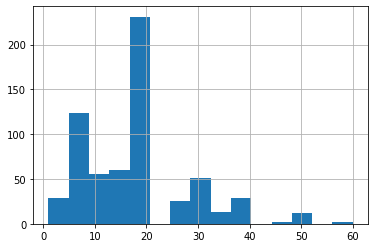

In [ ]:
coracao_fumantes.CIG.hist(bins=15)

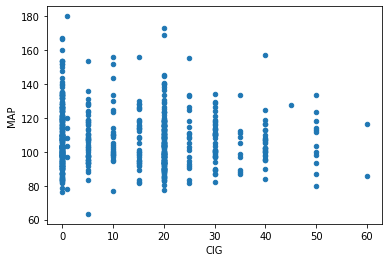

In [ ]:
coracao_fumantes_H = coracao[coracao.Sex == "MALE"]
coracao_fumantes_H.plot.scatter("CIG","MAP")

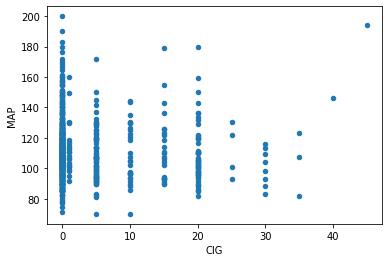

In [ ]:
coracao_fumantes_M = coracao[coracao.Sex == "FEM"]
coracao_fumantes_M.plot.scatter("CIG","MAP")

#Primeiras análises

O arquivo contém um conjunto de 250 pizzas. Cada pizza é descrita pelo seu **ID** (ordinal), a pizzaria (**Store**) onde foi feita (categórica), o tipo de massa (**CrustDescription**, categórica), o sabor (**Topping**,categórica) e seu diâmetro em centímetros (**Diameter**, contínua).

Abaixo mostramos os valores contidos nas variáveis categóricas.

In [ ]:
print(pizzas.Store.value_counts())
print()
print(pizzas.CrustDescription.value_counts())
print()
print(pizzas.Topping.value_counts())
print()
print(pizzas.Diameter.describe())

Dominos      125
EagleBoys    125
Name: Store, dtype: int64

DeepPan         83
ThinNCrispy     43
MidCrust        43
ClassicCrust    42
ThinCrust       39
Name: CrustDescription, dtype: int64

BBQMeatlovers    85
Hawaiian         84
Supreme          41
SuperSupremo     40
Name: Topping, dtype: int64

count    250.000000
mean      28.308200
std        1.276376
min       25.510000
25%       26.885000
50%       28.765000
75%       29.237500
max       31.060000
Name: Diameter, dtype: float64


Temos um total de amostras iguais (125) de cada pizzaria.

Em relação ao tipo de massa da pizza, observamos 5 categorias. Contudo, o texto que acompanha os dados explica que MidCrust e ClassicCrust, são denominações dadas pelas diferentes pizzarias para o mesmo tipo de massa (Mid). O mesmo ocorre entre ThinNCrispy e ThinCrust que deveria ser .

Em relação ao sabor, observamos 4 categorias. Novamente, o texto que acompanha os dados explica que Supreme e SuperSupremo, são denominações dadas pelas diferentes pizzarias para o mesmo sabor (Supreme).

Por conta destas questões renomearemos os tipos de massa e de sabor para atender o que é dito pelo no texto.

# Modificando os nomes das colunas e das categorias

In [ ]:
pizzas.columns = ["ID","Store","Crust","Topping","Diameter"]

pizzas.loc[pizzas.Crust == "MidCrust", "Crust"] = "Mid"
pizzas.loc[pizzas.Crust == "ClassicCrust", "Crust"] = "Mid"
pizzas.loc[pizzas.Crust == "ThinCrust", "Crust"] = "Thin"
pizzas.loc[pizzas.Crust == "ThinNCrispy", "Crust"] = "Thin"
print(pizzas.Crust.value_counts())
print()

pizzas.loc[pizzas.Topping == "SuperSupremo", "Topping"] = "Supreme"
print(pizzas.Topping.value_counts())

Mid        85
DeepPan    83
Thin       82
Name: Crust, dtype: int64

BBQMeatlovers    85
Hawaiian         84
Supreme          81
Name: Topping, dtype: int64


#Análise básica do diâmetro de cada pizzaria

Olhando o histograma do diâmetro, vemos dois picos bem destacados, um em torno de 26 a 27 cm e outro em torno de 28 a 30 cm. Isto indica que deve haver duas distribuições de dados no conjunto de diâmetros.

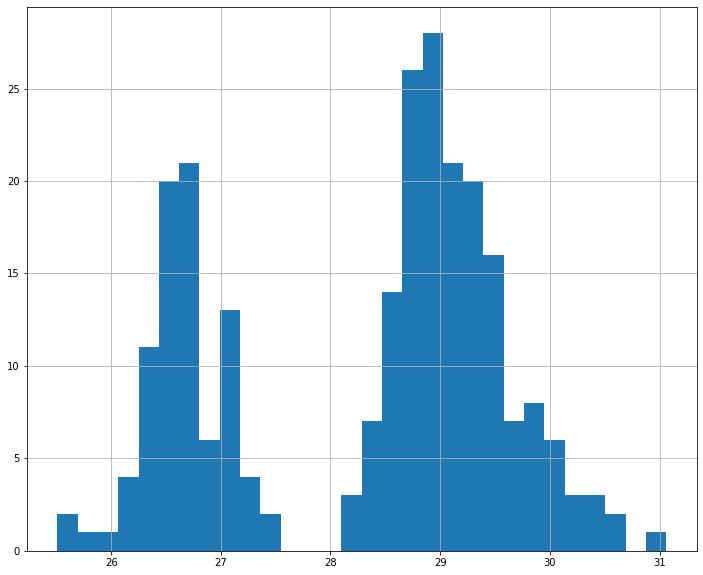

In [ ]:
pizzas.Diameter.hist(bins=30,figsize=(12,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f863f930f50>,
      dtype=object)

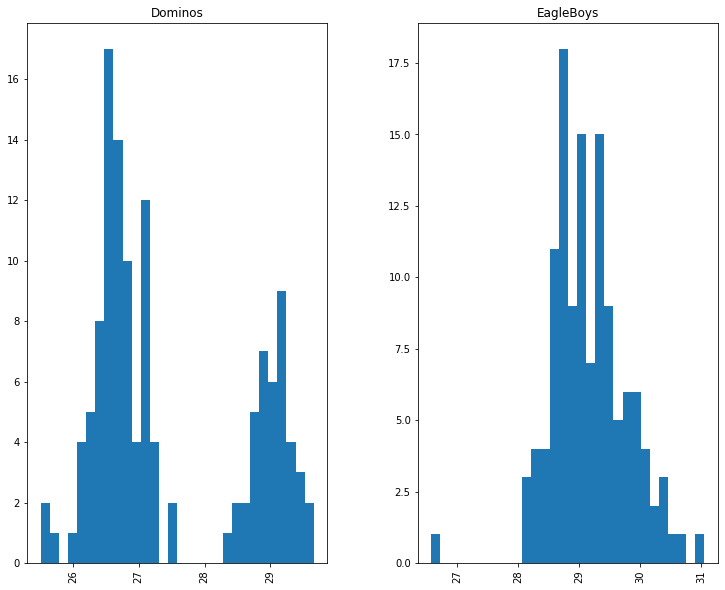

In [ ]:
pizzas.Diameter.hist(bins=30,by=pizzas.Store,figsize=(12,10))

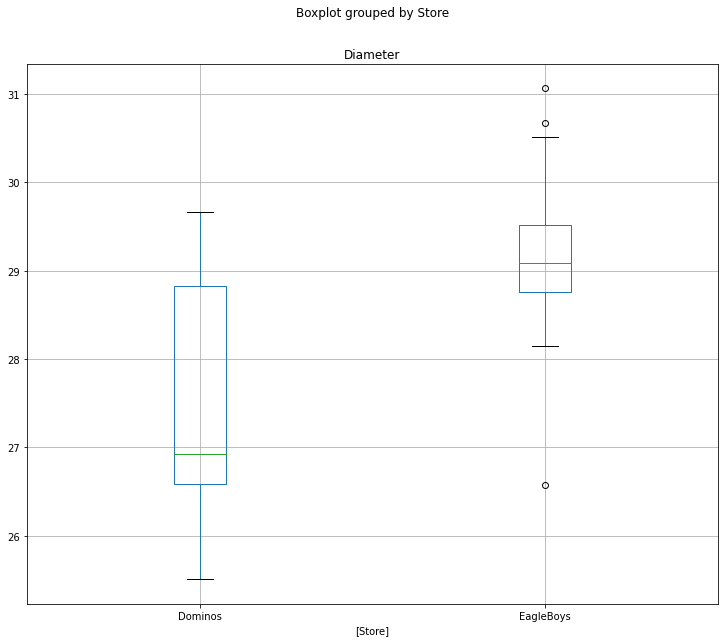

In [ ]:
pizzas.boxplot("Diameter",by=["Store"],figsize=(12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


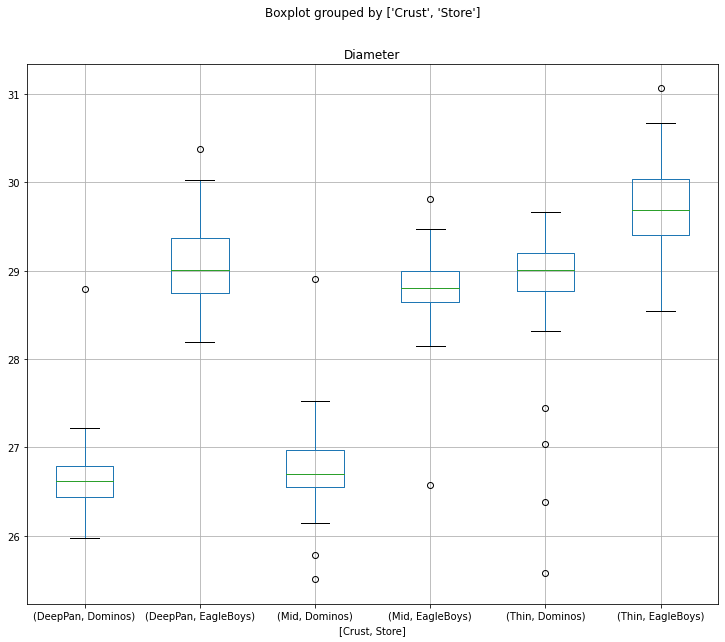

In [ ]:
pizzas.boxplot("Diameter",by=["Crust","Store"],figsize=(12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


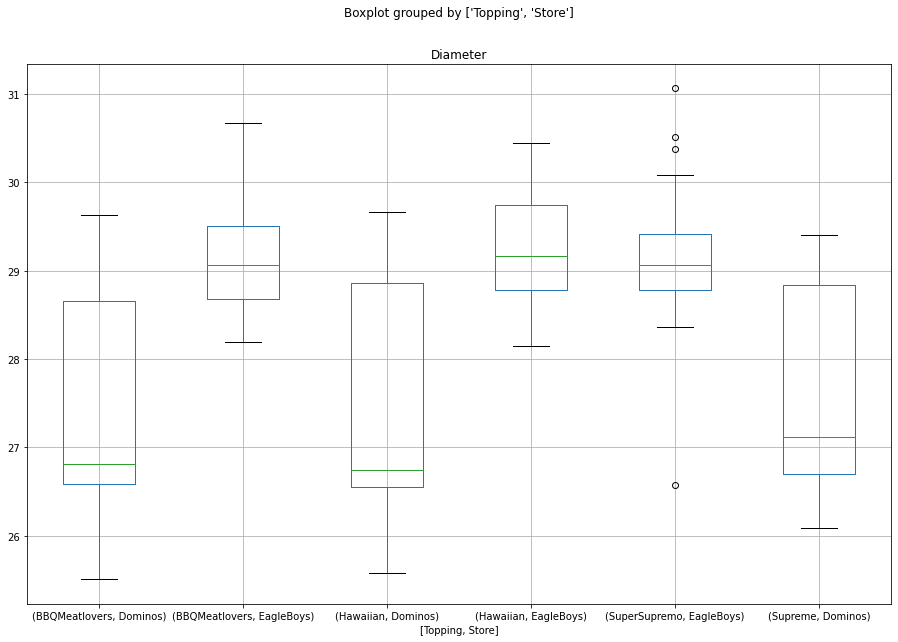

In [ ]:
pizzas.boxplot("Diameter",by=["Topping","Store"],figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


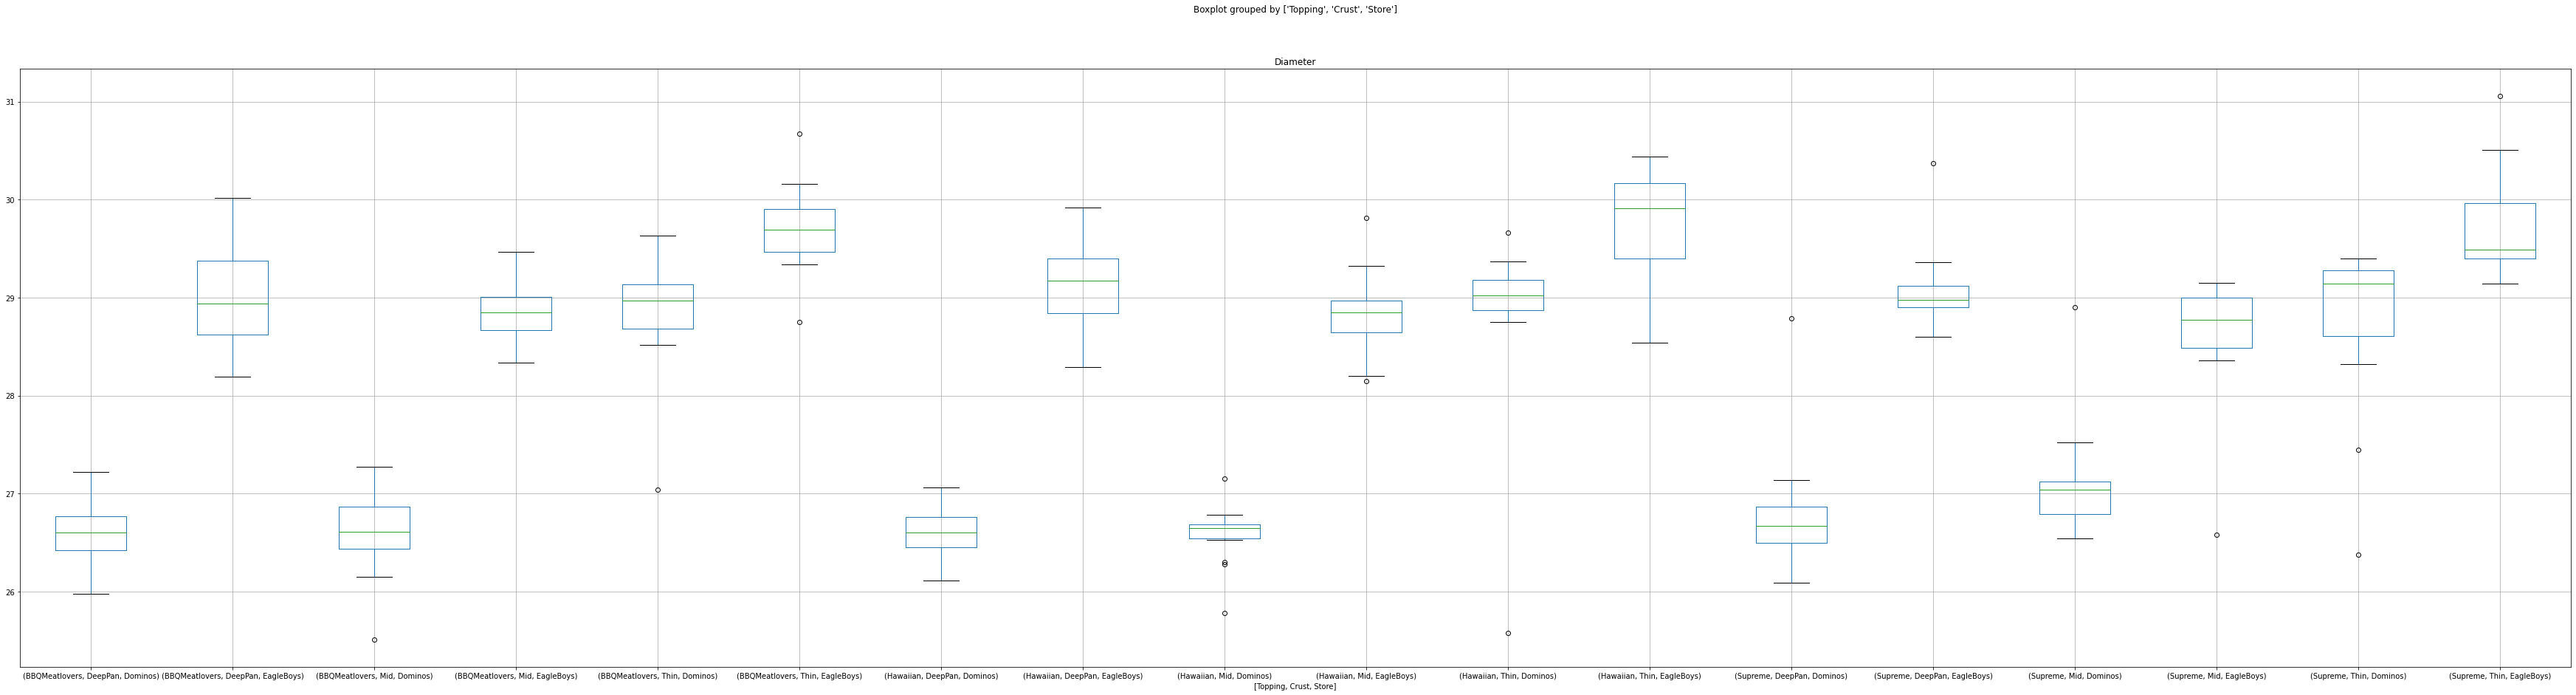

In [ ]:
pizzas.boxplot("Diameter",by=["Topping","Crust","Store"],figsize=(60,15))